# Tree base model

## Decision Tree(CART : Classification and Regression Tree)
> **`Decision Tree`** 모델은 **prediction/classification이 모두 가능**한 **supervised** 머신러닝 모델이다.   
스무고개 게임을 하듯 여러 개의 hypothesis을 데이터에 반영하고 이를 바탕으로 decision boundary(결정경계)를 생성  
모델 결과에 따른 해석이 굉장히 용이하여 **모델 해석이 필요한 문제에 사용**한다.ex)신용평가, 모델분류  
최근에는 `Decision Tree`모델을 베이스로 한 부스팅 트리 모델(**`Xgboost`**, **`LightGBM`**, **`Catboost`**)등으로 데이터분석 대회 수상을 하면서 실무 적용 케이스가 많아졌다.

### 모델구조
> 뿌리 노드(root node) : 최상위 노드, 모든 샘플 포함  
잎 노드(leaf node) : 최하위 노드, 여기에 속한 샘플이 어떤 클래스인지 결정 됨  
노드(node) : 뿌리 노드와 잎 노드 사이에 있는 노드  
가지(branch) : 노드를 나누는 기준  
깊이(depth) : 뿌리 노드와 잎 노드 까지의 노드 갯수

<img src="./image/27.png">

### 모델학습
#### impurity(불순도)
> `Decision Tree` 모델을 학습시키는 방법  
정보화 이론에서 사용하는 Gini index를 사용한다.  
값이 0.5에 가까수록 impurity가 높고 0 혹은 1에 가까울 수록 purity(순도)가 높다.  
즉, 한 노드의 impurity가 가능한 많이 떨어지도록(순도가 올라가도록, 값이 0으로 ) 노드를 나눈다.

$$ Gini = 1 - \sum_1^n{(p_i)^2} $$

$$ Entropy = - \sum_1^n{p_ilog(p_i)} $$

#### Gini index
위 예시에서 뿌리 노드 기준 지니계수 계산법  
class1 : 삼각형  
class2 : 동그라미  
>X < 0
>> True = class1 3개, class2 4개  
$1 - ({3 \over 3+4})^2 - ({4 \over 3+4})^2 = 0.48$  
False = class1 4개, class2 3개  
$1 - ({4 \over 4+3})^2 - ({3 \over 4+3})^2 = 0.48$  
total Gini 계수  
$1 - ({7 \over 7+7})0.48 - ({7 \over 7+7})0.48 = 0.52$

위 예시에서 잎 노드 기준 지니계수 계산법  
class1 : 삼각형  
class2 : 동그라미  
>Y < 1
>> True = class1 3개, class2 0개  
$1 - ({3 \over 3})^2 - ({0 \over 3})^2 = 0$  
False = class1 0개, class2 4개  
$1 - ({0 \over 4})^2 - ({4 \over 4})^2 = 0$  
total Gini 계수  
$1 - ({3 \over 3+4})0 - ({4 \over 3+4})0 = 1$

위의 예시에서 계산한 total Gini 계수가 Decision tree 모델이 학습을 하는 과정에서 참고하는 수치가 되며  
이를 바탕으로 더 나은 선택(곧 gini index를 가장 많이 감소시키는 가정)을 하게 되는 결정경계를 생성하는 방법으로 데이터를 학습하는데 이를 greedy(탐욕화) 알고리즘이라 한다.

### Decision Tree classifier 실습

In [7]:
# 필요모듈 import 
import pandas as pd
from sklearn.datasets import load_iris


In [8]:
# iris 데이터로드
iris = load_iris()

In [9]:
# 로딩 데이터 확인
iris
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [10]:
iris['feature_names'], iris['target_names']

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [11]:
# 데이터 분할
X = pd.DataFrame(iris["data"], columns=iris['feature_names'])
y = iris['target']
print(X)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [13]:
# 모델 import
from sklearn.tree import DecisionTreeClassifier

    

In [14]:
# 모델 생성
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
# help(DecisionTreeClassifier())

In [15]:
# 모델 학습
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [16]:
# 분류 결과값 확인
dtc_pred = dtc.predict(X_test)
print(dtc_pred)

dtc_pred1=dtc.predict(X_train)

dtc_pred_pro = dtc.predict_proba(X_test)
print(dtc_pred_pro)

[2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 2 1 0 2 2 1]
[[0.         0.02941176 0.97058824]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         0.5        0.5       ]
 [0.         0.02941176 0.97058824]
 [0.         0.02941176 0.97058824]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         0.02941176 0.97058824]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.02941176 0.97058824]
 [0.         0.02941176 0.97058824]
 [1.         0.         0.        ]
 [0.         0.02941176 0.97058824]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.02941176 0.97058824]
 [0.         0.02941176 0.97058824]
 [0.   

In [17]:
# 모델평가
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, dtc_pred))
print(classification_report(y_test, dtc_pred, target_names=iris['target_names']))

print(confusion_matrix(y_train, dtc_pred1))
print(classification_report(y_train, dtc_pred1, target_names=iris['target_names']))

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[35  0  0]
 [ 0 34  1]
 [ 0  1 34]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       0.97      0.97      0.97        35
   virginica       0.97      0.97      0.97        35

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [18]:
# test셋 분류 결과 확인


In [19]:
# 모델 평가지표 출력


### 모델 해석을 위한 시각화 방법
#### feature importance
트리 기반 모델은 트리를 분기하는 과정에서 어떤 변수가 모델을 학습하는데 중요한지 살펴볼 수 있다.

<BarContainer object of 4 artists>

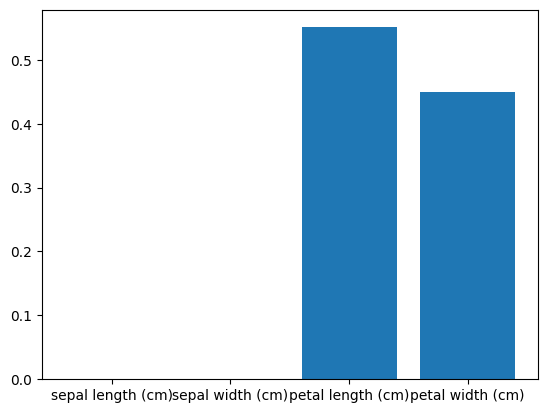

In [20]:
# feature importance 시각화. tree base model에서 변수 중요도 확인.
import matplotlib.pyplot as plt

plt.bar(iris['feature_names'], dtc.feature_importances_)
# 선형모델의 경우 coef_ 베타값을 확인. tree 모델에서는 변수 중요도 확인.

#### model plotting

In [21]:
# 모델 시각화
# from sklearn.tree import plot_tree
# plot_tree(dtc, feature_names=iris['feature_names'], class_names=['target_names'], filled=True)

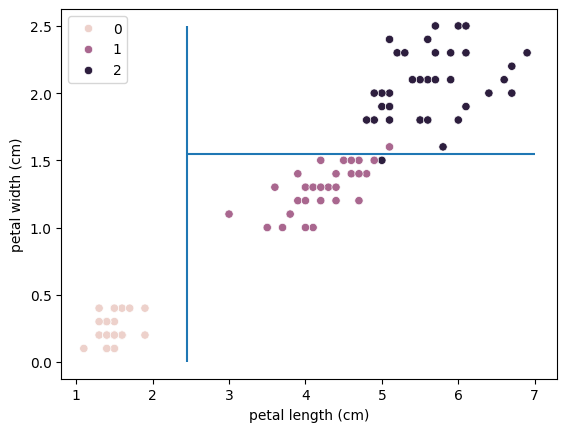

In [22]:
import seaborn as sns


sns.scatterplot(data=X_train, x=iris['feature_names'][2], y=iris['feature_names'][3], hue=y_train)   #데이터셋, x변수명, y변수명, 순서대로 전달
plt.vlines(2.45, 0, 2.5)
plt.hlines(1.55, 2.45, 7.0)

# plt.vlines(4.95, 0, 2.55)
# plt.hlines(1.7, 2.45, 7.0)


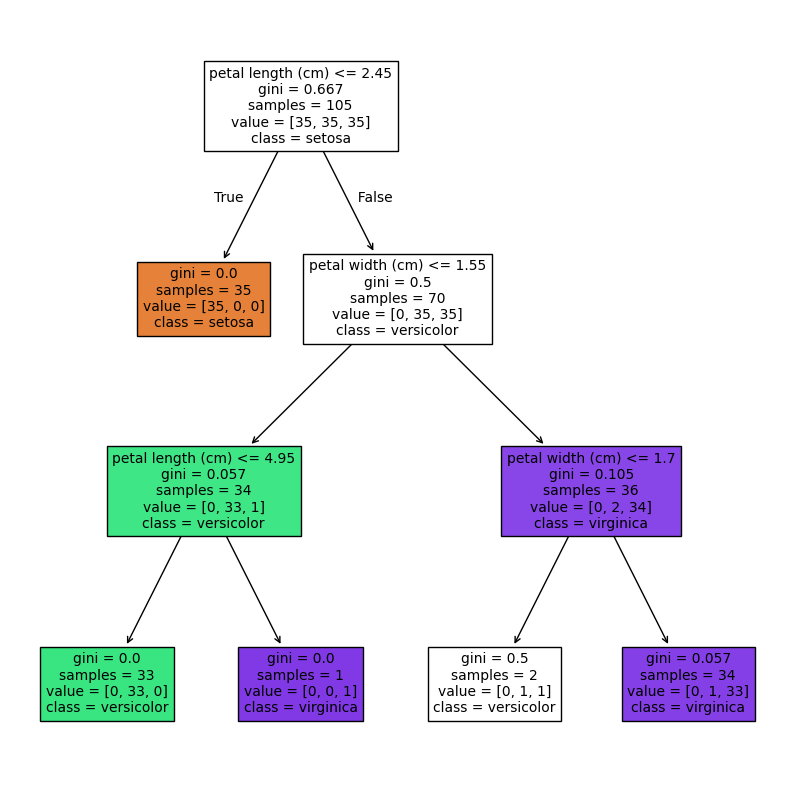

In [23]:
# 모델 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(dtc,
          feature_names=iris['feature_names'],
          class_names=iris['target_names'],
          filled=True)
plt.show()

## 아래 이미지를 보면 overfitting 상황.

### pruning(가지치기)
>`Decision Tree`는 모든 **잎 노드의 불순도가 0이 되는 순간까지 모델을 성장**시키면서 크기를 키워나간다.  
순수 노드로만 이루어진 트리 모델은 훈련 데이터를 100% 정확도로 맞출 수 있다.  
이러한 특성 때문에 트리 모델은 **overfitting에 취약**하다.  
과적합 방지를 위해서는 **트리의 복잡도를 제어** 할 필요가 있다.

>과적합 방지를 위한 모델링 파라메터  
>> - **`max_depth`** : 트리의 최대 깊이  
- `max_leaf_nodes` : 잎 노드의 최대개수  
- `min_sample_leaf` : 잎 노드가 되기 위한 최소 샘플 갯수  
- `min_sample_split` : 잎 노드가 분지 되기 위한 최소 샘플 갯수

위의 iris 데이터는 3개의 클래스로 이루어진 데이터셋이지만 모델플로팅 결과 2뎁스의 노드에서 어느정도 데이터 구분이 되었습니다.  
이를 기준으로 사후 가지치기를 진행 해 보겠습니다.

## Decision Tree Regressor
> `Decision Tree`모델은 알고리즘 특성으로 분류 및 예측 모델링에 모두 사용이 가능하다.  
일반적으로 잎 노드에 속한 학습샘플의 값의 평균을 바탕으로 예측값을 결정한다.  
회귀모델 평가 방법인 MSE를 각 노드에 속한 샘플에 적용하고 이를 최소화 시킨다.  

<img src="./image/28.png">

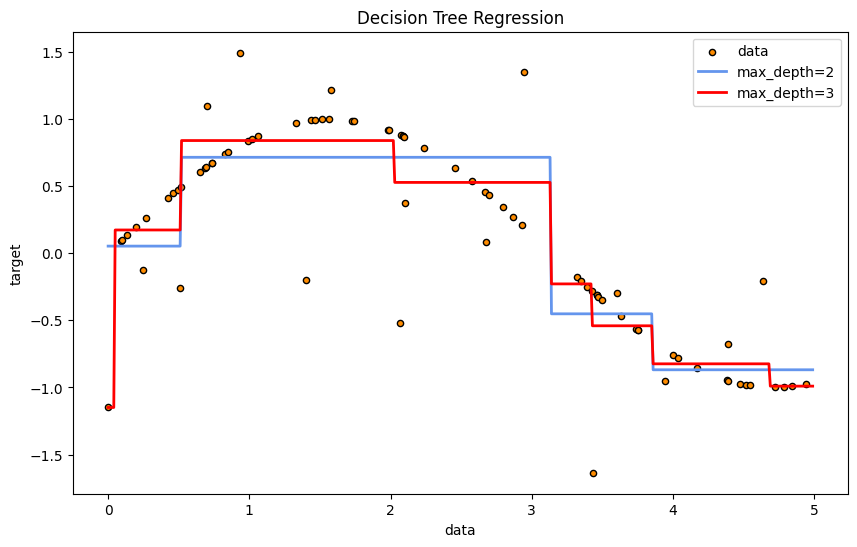

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import DecisionTr

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=3)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
# plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3, color="red", label="max_depth=3", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Decision Tree Regressor 실습

In [25]:
# 보스턴 집값 데이터 로딩
import pandas as pd

df = pd.read_csv('./data/boston.csv')
df.head()

# y=df['y']
# X=df.drop('y', axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
# 타겟 데이터 분할
y=df['y']
X=df.drop('y', axis=1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [27]:
# 테스트 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
# 모델 import
from sklearn.tree import DecisionTreeRegressor



In [29]:
# 모델 생성
# dtr = DecisionTreeRegressor()
dtr = DecisionTreeRegressor(max_depth=15, random_state=42)

In [30]:
# 모델 학습
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

In [31]:
# 모델 예측
dtr_pred = dtr.predict(X_test)
dtr_pred

array([20.43      , 33.1       , 15.2       , 23.7       , 19.1       ,
       20.98333333, 19.3       , 17.8       , 22.36666667, 22.25454545,
       18.8       , 27.1       ,  8.5       , 20.98333333, 17.75      ,
       25.        , 20.5       ,  7.2       , 50.        , 13.        ,
       23.        , 22.2       , 15.56666667, 22.        , 13.1       ,
       14.6       , 22.25454545, 13.5       , 17.8       , 22.25454545,
       27.1       , 23.1       , 17.8       , 21.9       , 13.8       ,
       15.6       , 33.        , 18.875     , 21.7       , 24.8       ,
       19.8       , 30.1       , 50.        , 17.75      , 22.36666667,
       13.1       , 15.56666667, 24.1       , 19.1       , 32.5       ,
       22.25454545, 36.1       , 19.4       , 32.        , 43.1       ,
       25.        , 13.1       , 27.9       , 22.        , 22.5       ,
       24.8       , 33.        , 29.4       , 18.2       , 26.6       ,
       14.48571429, 13.        , 22.9       , 27.9       , 19.  

In [32]:
# 모델 평가지표 출력
from sklearn.metrics import r2_score, root_mean_squared_error

print(f"r2_score: {r2_score(y_test, dtr_pred)}")
print(f"RMSE : {root_mean_squared_error(y_test, dtr_pred)}")


# 3.6059576547271788
# 0.8254946931329356

# r2_score: 0.8430197030956726
# RMSE : 3.315551508001648

r2_score: 0.8430197030956726
RMSE : 3.315551508001648


In [33]:
dtr.feature_importances_

array([4.98967447e-02, 1.39793830e-03, 1.33528739e-02, 2.20801791e-04,
       2.69120667e-02, 5.88907405e-01, 1.53266250e-02, 7.34794395e-02,
       2.12078161e-03, 5.62467836e-03, 2.48847121e-02, 8.95208789e-03,
       1.88923845e-01])

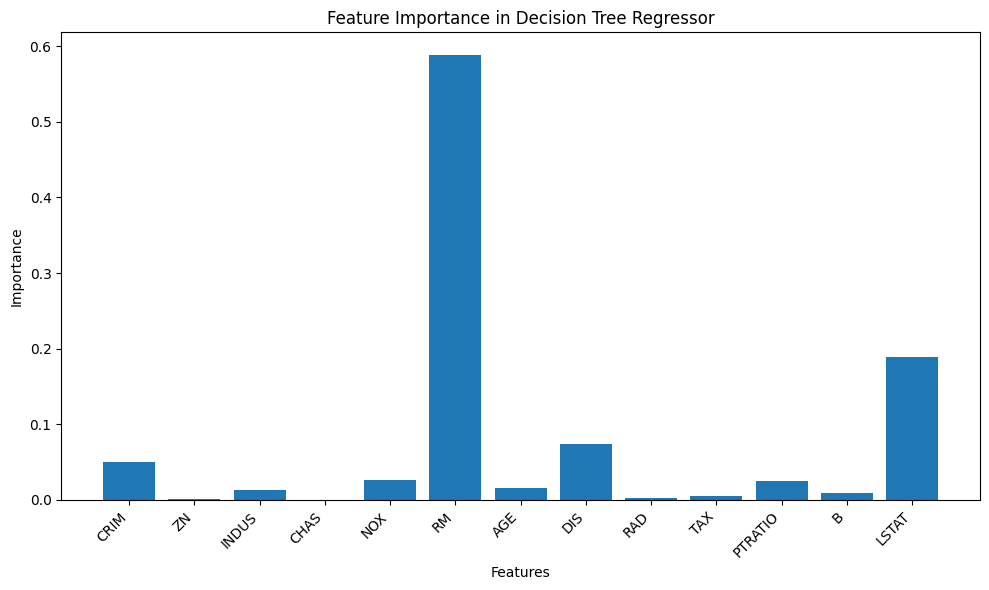

In [34]:
# feature importance
# import matplotlib.pyplot as plt

# plt.bar(iris['feature_names'], dtr.feature_importances_)


# feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(X.columns, dtr.feature_importances_)
plt.title('Feature Importance in Decision Tree Regressor')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

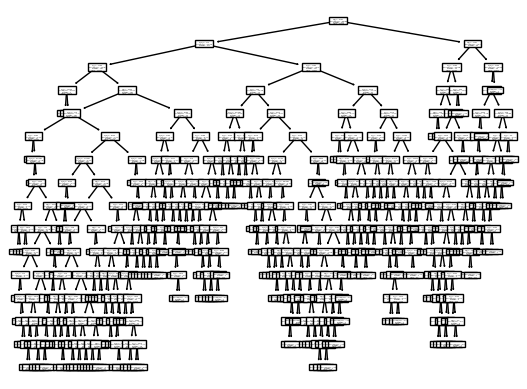

In [35]:
plot_tree(dtr); # --> 너무 복잡 -> overfitting --> max_depth 를 제한하자.

## Random Forest
>**`Random forest`** 는 **`Decision Tree`** 모델의 **ensemble(앙상블)방법론**  

### ensemble(앙상블)
> **복수의 예측 모형을 결합**하여 더 나은 성능의 예측을 하려는 시도이다.  
단일 모형을 사용할 때 보다 **성능 분산이 감소**하고, 즉 **overfitting을 방지**한다.  
개별 모형이 성능이 안좋을 경우에는 결합 모형의 성능이 더 향상된다.  
앙상블 방법론에는 **bagging**, **boosting**이 있다.

<img src="./image/30.gif">

#### bagging(배깅)
> 개별 모델을 병렬로 구성하여 모델을 결합하는 방법론이다.  
학습데이터에서 **복원 추출**로 여러개의 sub sample 데이터셋을 만든 후(bootstrap)  
각 데이터셋을 병렬 구성 모델에 학습시켜 서로 다른 결과를 얻는다.(aggregation).  
이후 개별 모델의 결과값을 voting(투표법) 혹은 평균법을 사용하여 개별 모델 결과를 바탕으로 최종 추정치를 얻는다.(bagging)

<img src="./image/31.png">

#### Random Forest Bootstrap Aggregating
> **`Random forest`** 는 대표적인 배깅 방법론으로 weak model로 **`Decision Tree`** 를 사용한다.  
`Random forest`에 사용되는 bootstrap sub sample 데이터셋 생성 시 랜덤 샘플 및 feature를 선택하여 모델 학습에 사용한다.

<img src="./image/32.jpeg">

### Random Forest 실습

In [36]:
# 모델 import
from sklearn.ensemble import RandomForestRegressor

### overfitting 방지를 위한 모델링 파라메터  
> - **n_estimators** : 사용 할 트리 모델 갯수  
> - **max_depth** : 트리의 최대 깊이

In [160]:
# 모델 생성
rfr = RandomForestRegressor(random_state=42)    # model 개수 default 는 100개. (n_estimators)

In [161]:
# 모델 학습
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [162]:
# 모델 예측
rfr_pred = rfr.predict(X_test)

In [163]:
# 평가
from sklearn.metrics import r2_score, root_mean_squared_error

print(f"r2_score: {r2_score(y_test, rfr_pred)}")
print(f"RMSE : {root_mean_squared_error(y_test, rfr_pred)}")


## poly
# 3.6059576547271788
# 0.8254946931329356

# Decision Tree dtr
# r2_score: 0.8430197030956726
# RMSE : 3.315551508001648

## rfr
# r2_score: 0.8518521336172665
# RMSE : 3.2209271834768067

r2_score: 0.8518521336172665
RMSE : 3.2209271834768067


## 파라메터 서칭
tree base 모델은 설정 가능한 파라메터의 조합에 따라 모델 예측력 차이가 큰 특징을 가지고 있습니다.  
특히, Xgboost 모델의 경우 파라메터 설정에 따른 모델 예측력 차이가 굉장히 크기에 꼭 파라메터 서칭을 진행해주셔야 합니다.  
간단한 문법을 통해 파라메터 서칭을 진행 해보겠습니다.

In [165]:
# 필요모듈 import 
from itertools import product


In [168]:
# validation set 생성 -> train data에서 또 쪼개기.
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42) 

In [192]:
X_train2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
446,6.28807,0.0,18.10,0.0,0.740,6.341,96.4,2.0720,24.0,666.0,20.2,318.01,17.79
440,22.05110,0.0,18.10,0.0,0.740,5.818,92.4,1.8662,24.0,666.0,20.2,391.45,22.11
350,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98
294,0.08199,0.0,13.92,0.0,0.437,6.009,42.3,5.5027,4.0,289.0,16.0,396.90,10.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,11.08740,0.0,18.10,0.0,0.718,6.411,100.0,1.8589,24.0,666.0,20.2,318.75,15.02
111,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16
216,0.04560,0.0,13.89,1.0,0.550,5.888,56.0,3.1121,5.0,276.0,16.4,392.80,13.51
160,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50


In [171]:
# product 함수로 파라메터의 모든 조합 만들기
# est = [100, 200, 300, 400, 500, 700, 900, 1100, 1300, 1500]
est = [80, 90, 100, 120, 140, 150, 170]
# depth = [3, 5, 7, 9, 11, 13, 15]
depth = [13, 14, 15, 16, 17]


# list(product(est, depth)) # 모든 가능한 조합을 만들어줌.

best_score = 99999
best_param = None

for param in list(product(est, depth)):
    print(f'{param} Searching...')
    model = RandomForestRegressor(n_estimators=param[0], max_depth=param[1], random_state=42)
    model.fit(X_train2, y_train2)   # 파라미터 조합을 찾기 위한 검증용 데이터를 제외한 나머지 데이터로 학습.
    pred = model.predict(X_val)    # 검증용 validation set 사용
    rmse = root_mean_squared_error(y_val, pred)

    if rmse < best_score :
        print('Score Updated!')
        best_score = rmse
        best_param = param

print("Search Completed")



(80, 13) Searching...
Score Updated!
(80, 14) Searching...
Score Updated!
(80, 15) Searching...
(80, 16) Searching...
(80, 17) Searching...
(90, 13) Searching...
Score Updated!
(90, 14) Searching...
Score Updated!
(90, 15) Searching...
(90, 16) Searching...
(90, 17) Searching...
(100, 13) Searching...
Score Updated!
(100, 14) Searching...
Score Updated!
(100, 15) Searching...
(100, 16) Searching...
(100, 17) Searching...
(120, 13) Searching...
Score Updated!
(120, 14) Searching...
(120, 15) Searching...
(120, 16) Searching...
(120, 17) Searching...
(140, 13) Searching...
(140, 14) Searching...
(140, 15) Searching...
(140, 16) Searching...
(140, 17) Searching...
(150, 13) Searching...
(150, 14) Searching...
(150, 15) Searching...
(150, 16) Searching...
(150, 17) Searching...
(170, 13) Searching...
Score Updated!
(170, 14) Searching...
Score Updated!
(170, 15) Searching...
Score Updated!
(170, 16) Searching...
Score Updated!
(170, 17) Searching...
Search Completed


In [172]:
# 위 파라메터 조합을 반복문으로 순환하며 파라메터 서칭
best_score, best_param

# (np.float64(4.439063747416131), (200, 13))

(np.float64(4.405226761275171), (170, 16))

In [39]:
# 최적 r2값, 최적 파라메터 확인


In [176]:
# 최적 모델로 모델 다시 학습 및 평가
best_model = RandomForestRegressor(n_estimators=best_param[0], max_depth = best_param[1], random_state=42)
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)

print(f"r2_score: {r2_score(y_test, best_pred)}")
print(f"RMSE : {root_mean_squared_error(y_test, best_pred)}")


## poly
# 3.6059576547271788
# 0.8254946931329356

# Decision Tree dtr
# r2_score: 0.8430197030956726
# RMSE : 3.315551508001648

## rfr
# r2_score: 0.8518521336172665
# RMSE : 3.2209271834768067

## param search, decision tree
# r2_score: 0.8576898465843038
# RMSE : 3.156829668623985

r2_score: 0.8576898465843038
RMSE : 3.156829668623985


## Boosting Tree
> bagging과 boosting의 차이점은 학습을 위해 사용하는 개별모델을 병렬/직렬로 구성함에 있다.  
배깅의 경우 sub sample에 따라 개별 모델을 모두 학습시키고 결과를 투표 혹은 평균을 내어 예측한다면  
부스팅은 **개별 모델의 학습을 순차적**으로 시키며 이전 개별 모델의 결과 중 **오분류 된 데이터 혹은 오차에 가중치 부여**  
초기에는 동일 가중치를 갖지만 각 학습 과정을 거치며 복원 추출 시 가중치의 분포/이전 round의 오차를 고려  

>> 해당모델에는 `Adaboost`, `GBM`, `Xgboost`, `lightGBM`, `catboost`가 있다.

### bagging 과 boosting
<img src="./image/33.png">

### Adaptive booting(Adaboost)
> a -> f 순서로 학습이 진행 되고 있다. 각 학습 단계(round)에서 오분류 된 데이터에 가중치를 부여하고  
다음 라운드에서 가중치가 부여 된 데이터를 잘 맞추기 위한 개별모델이 학습 된다.  
최종 모델은 개별 모델의 결과가 합쳐져서 최종 모델링이 된다.

<img src="./image/34.png">

### gradient boost(GBM)
이전 round 모델의 데이터별 오류를 학습하는 모델을 사용하여 점진적으로 총 모델링 오차를 줄이는 부스팅 방법

$$y = h_0(x) + error_0 $$
$$error_0 = h_1(x) + error_1 $$
$$error_1 = h_2(x) + error_2 $$
$$\vdots$$
$$y = h_0(x) + h_1(x) + h_2(x) + \cdots + small error $$

<img src="./image/35.png">

## xgboost
> 머신러닝 알고리즘 대회인 kaggle, KDD cup등에서 우승을 한 팀들이 xgboost를 많이 활용한 것이 알려지면서 주목받음.  
boosting 모델에서 오류를 학습하여 다음 round에 반영시키는 것은 gadient boosting과 큰 차이가 없음.  
다만, 학습을 위한 비용함수에 규제화 식이 추가되어 모델이 과적합 되는 것을 방지함.  
규제화를 통해 복잡한 모델에 패널티를 부여  

$$obj^{(t)} = \sum_1^{n} l(y_i, \hat{y}_i^{(t)}) + \sum_{i=1}^t \Omega(f_i) $$

연구논문 : https://arxiv.org/pdf/1603.02754.pdf  
논문까지는 아니지만 학습과정은 알고싶다 : https://brunch.co.kr/@snobberys/137

In [178]:
# 모델 설치
# !pip install xgboost
!pip list

Package                   Version
------------------------- --------------
anyio                     4.6.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
boltons                   23.0.0
brotlipy                  0.7.0
certifi                   2023.7.22
cffi                      1.15.1
charset-normalizer        2.0.4
colorama                  0.4.6
comm                      0.2.2
conda-content-trust       0.2.0
conda-package-handling    2.2.0
conda_package_streaming   0.9.0
contourpy                 1.3.0
cryptography              41.0.3
cycler                    0.12.1
debugpy                   1.8.5
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.1.0
fastjsonschema            2.20.0
fonttools      

In [185]:
# 모델 import
from xgboost import XGBRegressor

In [179]:
# 보스턴 데이터 로드
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
182,0.09103,0.0,2.46,0.0,0.4880,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76
126,0.38735,0.0,25.65,0.0,0.5810,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26
329,0.06724,0.0,3.24,0.0,0.4600,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [30]:
# 타겟 데이터 분할

# 테스트셋 분할


In [186]:
# 모델 생성
xgbr = XGBRegressor(random_state=42)
'''
xgboost 주요 파라메터

모델 파라메터
verbosity : round 출력결과 0=무음, 1=경고, 2=정보, 3=디버그
n_jobs : 병렬쓰레드 구성, 로컬컴퓨터 코어 x 4 최대값
gpu_id : GPU 연산 처리 디바이스 설정
random_state : 랜덤시드
missing : 결측치 처리 np.nan을 디폴트로 사용

트리 파라메터
max_depth : 트리모델 최대 깊이
max_leaves : 트리모델 최대 잎 노드 갯수, 0=무제한 지정
grow_policy : 트리확장 방법 0=노드와 가장 가까운 노드 분할, 1=손실함수가 최소가 되는 지점에서 분할
gamma : 트리모델의 잎 노드 분할을 만드는 데 필요한 최소 손실 감소.
min_child_weight : 관측치에 대한 최소 가중치 값
subsample : 부트스트랩 샘플 비율
colsample_bytree : 부트스트랩 컬럼 비율
reg_alpha : L1, lasso, 0
reg_lambda : L2, ridge, 1

부스팅 파라메터
n_estimators : 부스팅 트리 갯수, round 횟수와 같은 수 --> 값이 너무 크면 overfitting 가능성이 생김.
learning_rate : round별 학습률
booster: 부스팅 트리 모델 선택
    gbtree
    gblinear
objective : 목적함수 (cost function)
    reg : squarederror
    binary : logistic
    multi : softmax
    multi : softprob
eval_metric : 모델평가함수, 목적함수에 따라 지정되어 있음
    rmse: root mean square error
    error: Binary classification error rate (0.5 threshold)
    merror: Multiclass classification error rate
early_stopping_rounds : 학습 손실값 변동 없을 시 학습 종료 라운드 횟수 설정
callbacks : 학습 중 설정 값 전달 API
'''

'\nxbgoost 주요 파라메터\n\n모델 파라메터\nverbosity : round 출력결과 0=무음, 1=경고, 2=정보, 3=디버그\nn_jobs : 병렬쓰레드 구성, 로컬컴퓨터 코어 x 4 최대값\ngpu_id : GPU 연산 처리 디바이스 설정\nrandom_state : 랜덤시드\nmissing : 결측치 처리 np.nan을 디폴트로 사용\n\n트리 파라메터\nmax_depth : 트리모델 최대 깊이\nmax_leaves : 트리모델 최대 잎 노드 갯수, 0=무제한 지정\ngrow_policy : 트리확장 방법 0=노드와 가장 가까운 노드 분할, 1=손실함수가 최소가 되는 지점에서 분할\ngamma : 트리모델의 잎 노드 분할을 만드는 데 필요한 최소 손실 감소.\nmin_child_weight : 관측치에 대한 최소 가중치 값\nsubsample : 부트스트랩 샘플 비율\ncolsample_bytree : 부트스트랩 컬럼 비율\nreg_alpha : L1, lasso, 0\nreg_lambda : L2, ridge, 1\n\n부스팅 파라메터\nn_estimators : 부스팅 트리 갯수, round 횟수와 같은 수\nlearning_rate : round별 학습률\nbooster: 부스팅 트리 모델 선택\n    gbtree\n    gblinear\nobjective : 목적함수 \n    reg : squarederror\n    binary : logistic\n    multi : softmax\n    multi : softprob\neval_metric : 모델평가함수, 목적함수에 따라 지정되어 있음\n    rmse: root mean square error\n    error: Binary classification error rate (0.5 threshold)\n    merror: Multiclass classification error rate\nearly_stopping_rounds : 학습 손실값 변동 없을 시 학습 종료

In [187]:
# 모델 학습
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [188]:
# 모델 예측
xgbr_pred = xgbr.predict(X_test)

In [189]:
# 평가지표 출력
print(f"r2_score: {r2_score(y_test, xgbr_pred)}")
print(f"RMSE : {root_mean_squared_error(y_test, xgbr_pred)}")


## poly
# 3.6059576547271788
# 0.8254946931329356

# Decision Tree dtr
# r2_score: 0.8430197030956726
# RMSE : 3.315551508001648

## rfr
# r2_score: 0.8518521336172665
# RMSE : 3.2209271834768067

## param search, decision tree
# r2_score: 0.8576898465843038
# RMSE : 3.156829668623985

r2_score: 0.8497946796861642
RMSE : 3.2432159260917577


<BarContainer object of 13 artists>

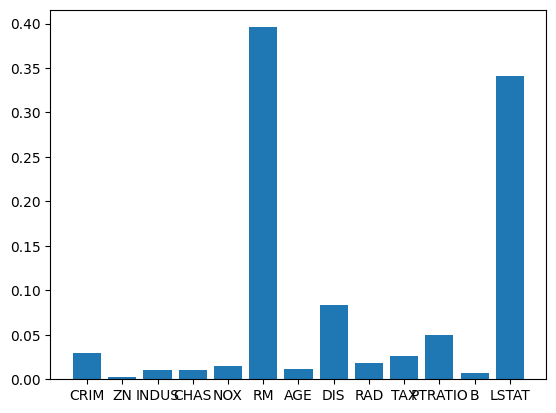

In [191]:
# 변수 중요도 출력
plt.bar(X_train.columns, xgbr.feature_importances_)

### sklearn GridSearchCV
sklearn 패키지에는 위의 파라메터 서칭 과정을 간편하게 진행 할 수 있도록 GridSearchCV 방법론을 제공합니다.  
기존 파라메터 서칭과 함께 cross validation 과정을 추가하여 데이터 분할에 강건한 모델을 선택할 수 있도록 제작 되었습니다.

In [1]:
# 그리드 서치 import
from sklearn.model_selection import GridSearchCV

In [2]:

from xgboost import XGBRegressor
xgbr = XGBRegressor(random_state=42)
params = {
    'max_depth' : [3,5,7,9,11,13,15],
    'subsample' : [0.7,0.8,0.9,1],
    'colsample_bytree' : [0.7,0.8,0.9,1],
    'n_estimators' : [100,300,500,700,1000,1500],
    'learning_rate' : [0.03, 0.01]

    # 'reg_alpha' : [0,1],
    # 'reg_lambda' : [0,1]


}

In [3]:
# 그리드 서치 실습

grid = GridSearchCV(estimator=xgbr,
                    param_grid = params,
                    scoring='r2',
                    verbose=2,
                    cv=5)   ##########

'''
estimator : 모델 딕셔너리
param_grid : 파라메터 딕셔너리
scoring=None : 평가방법
n_jobs=None : 학습에 사용할 컴퓨터 코어 갯수
verbose=0 : 리포트 형식 0, 1, 2

scoring 참고
https://scikit-learn.org/stable/modules/model_evaluation.html
'''

'\nestimator : 모델 딕셔너리\nparam_grid : 파라메터 딕셔너리\nscoring=None : 평가방법\nn_jobs=None : 학습에 사용할 컴퓨터 코어 갯수\nverbose=0 : 리포트 형식 0, 1, 2\n\nscoring 참고\nhttps://scikit-learn.org/stable/modules/model_evaluation.html\n'

In [4]:
# grid 학습
import pandas as pd

df = pd.read_csv('./data/boston.csv')
df.head()

y=df['y']
X=df.drop('y', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

grid.fit(X_train, y_train)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 데이터 로드 및 분할
df = pd.read_csv('./data/boston.csv')
y = df['y']
X = df.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost 모델 및 파라미터 그리드 설정
xgbr = XGBRegressor(random_state=42)
params ={
    'max_depth' : [3, 5, 7, 9, 11, 13, 15],
    'subsample' : [0.7, 0.8, 0.9, 1],
    'colsample_bytree' : [0.7, 0.8, 0.9, 1],
    'n_estimators' : [100, 300, 500, 700, 1000, 1500],
    'learning_rate' : [0.03, 0.01]
}



# GridSearchCV 설정 및 실행
# grid = GridSearchCV(estimator=xgbr,
#                     param_grid=params,
#                     scoring='neg_mean_squared_error',
#                     cv=5,
#                     verbose=2,
#                     n_jobs=-1)

grid = GridSearchCV(estimator=xgbr,
                    param_grid=params,
                    scoring='r2',
                    verbose=2,
                    n_jobs=-1,
                    cv=5)

grid.fit(X_train, y_train)



Fitting 5 folds for each of 1344 candidates, totalling 6720 fits


In [ ]:
# 최적 모델 및 파라미터 확인
print("Best parameters:", grid.best_params_)
# print("Best score:", np.sqrt(-grid.best_score_))

# 테스트 세트에 대한 성능 평가
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Test R2 score:", r2)
print("Test RMSE:", rmse)

In [44]:
# 최적 모델 및 파라메터 확인


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 데이터 로드 및 분할
df = pd.read_csv('./data/boston.csv')
y = df['y']
X = df.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost 모델 및 파라미터 그리드 설정
xgbr = XGBRegressor(random_state=42)
params ={
    'max_depth' : [3, 4, 5],
    'subsample' : [0.85,0.9,0.95],
    'colsample_bytree' : [0.75, 0.8, 0.85],
    'n_estimators' : [700, 710, 720, 730, 750,760,770,780, 800],
    # 'learning_rate' : [0.03, 0.01]
}



# GridSearchCV 설정 및 실행

grid = GridSearchCV(estimator=xgbr,
                    param_grid=params,
                    scoring='r2',
                    verbose=2,
                    n_jobs=-1,
                    cv=5)

grid.fit(X_train, y_train)



Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\User\miniconda3\envs\ml\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [700, 710, 720, 730, 750, 760, 770,
                                          780, 800],
                         'subsample': [0.85, 0.9, 0.95]},
             scoring='r2', verbose=2)

In [2]:
# 최적 모델 및 파라미터 확인
print("Best parameters:", grid.best_params_)
# print("Best score:", np.sqrt(-grid.best_score_))

# 테스트 세트에 대한 성능 평가
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Test R2 score:", r2)
print("Test RMSE:", rmse)

Best parameters: {'colsample_bytree': 0.8, 'max_depth': 4, 'n_estimators': 760, 'subsample': 0.9}
Test R2 score: 0.8512064200329519
Test RMSE: 3.3297252505228903


In [3]:
grid.best_params_

{'colsample_bytree': 0.8,
 'max_depth': 4,
 'n_estimators': 760,
 'subsample': 0.9}

In [ ]:
grid.best_estimator_

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import Pipeline

# 데이터 로드
df = pd.read_csv('./data/kospi.csv', encoding='cp949')

# 결측치 처리
df = df.dropna()

# 특성과 타겟 분리
y = df['코스피지수']
X = df.drop(columns=['코스피지수'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# XGBoost 모델 및 파라미터 그리드 설정
xgbr = XGBRegressor(random_state=42)
params ={
    'max_depth' : [3, 4, 5],
    'subsample' : [0.85,0.9,0.95],
    'colsample_bytree' : [0.75, 0.8, 0.85],
    'n_estimators' : [700, 710, 720, 730, 750,760,770,780, 800],
    # 'learning_rate' : [0.03, 0.01]
}



# GridSearchCV 설정 및 실행

grid = GridSearchCV(estimator=xgbr,
                    param_grid=params,
                    scoring='r2',
                    verbose=2,
                    n_jobs=-1,
                    cv=5)

grid.fit(X_train, y_train)


# 최적의 모델로 예측
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# RMSE 계산
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Best parameters: {grid.best_params_}")
print(f"RMSE: {rmse}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'colsample_bytree': 0.75, 'max_depth': 5, 'n_estimators': 800, 'subsample': 0.95}
RMSE: 134.93287631962758
